In [1]:
from gameagent import Agent
import gym
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\ie-49\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ie-49\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ie-49\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users

In [ ]:
def run_training(iteration):
    for iterate in range(1,iteration+1):
        print('iterate : ',iterate)
        if iterate % 5 == 0:
            run_episode(train = True, render = False, train_batch_size=640,verbose=False)
        else:
            run_episode(train = False, render = False, train_batch_size=640,verbose=False)

In [3]:
env = gym.make("Pendulum-v0")


In [9]:
agent = Agent(3,1,train_batch_size = 128)
max_len = 200

In [18]:
import matplotlib.pyplot as plt

In [20]:
%matplotlib tk
plt.plot(episode_reward_lst)

E0830 13:10:27.990663  4324 ioloop.py:763] Exception in callback functools.partial(<function Kernel.enter_eventloop.<locals>.advance_eventloop at 0x00000242CBEB5620>)
Traceback (most recent call last):
  File "C:\Users\ie-49\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\ie-49\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 314, in advance_eventloop
    eventloop(self)
  File "C:\Users\ie-49\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\eventloops.py", line 238, in loop_tk
    app.tk.createfilehandler(stream.getsockopt(zmq.FD), READABLE, notifier)
AttributeError: '_tkinter.tkapp' object has no attribute 'createfilehandler'


In [10]:
epsilon = 0.999
epsilon_decaying = 0.99995
def run_episode(train = True, render = False, train_batch_size = 640,verbose = False):
    global epsilon
    global epsilon_decaying
    epsilon *= epsilon_decaying
    done = False
    frame = env.reset()
    ep_reward = 0
    i = 0
    while done != True:
        if render:
            env.render()
        state = frame.reshape(1,-1)
        state = (state - env.observation_space.low) / \
                (env.observation_space.high - env.observation_space.low)
        if np.random.random() < epsilon:
            action = np.clip(agent.get_action(state) + (np.random.normal()*epsilon),-1,1)
        else:
            action = agent.get_action(state)
        next_frame, reward, done, _ = env.step(action)
        agent.memory.add(state,action,reward,next_frame.reshape(1,-1),done)
        ep_reward += reward
        frame = next_frame
        if i == 200:
            done = True
        if verbose :
            print('state : ', state, ', action :', action, ', reward : ',reward,', reward : ', reward,', done : ',done,\
                ', ep_reward : ',ep_reward)
    if train:
        print('trained_start')
        agent.train()
        print('trained_well')
    print("ep_reward:", ep_reward)
    episode_reward_lst.append(ep_reward)
    i += 1

In [11]:
episode_reward_lst = []

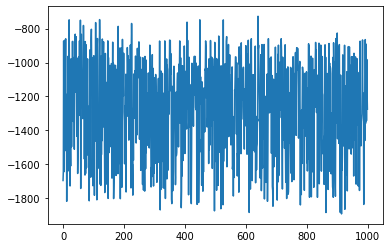

In [21]:
%matplotlib inline
plt.plot(episode_reward_lst)

In [24]:
agent.main_actor.model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 3)                 0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 3)                 12        
_________________________________________________________________
dense_41 (Dense)             (None, 128)               512       
_________________________________________________________________
dense_42 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_43 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 129       
Total params: 66,573
Trainable params: 66,567
Non-trainable params: 6
______________________________________________________

In [25]:
agent.main_critic.model.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 3)            0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
batch_normalization_13 (BatchNo (None, 3)            12          input_13[0][0]                   
__________________________________________________________________________________________________
batch_normalization_14 (BatchNo (None, 1)            4           input_14[0][0]                   
____________________________________________________________________________________________

In [13]:
run_training(1000)

iterate :  1
ep_reward: [-1696.8821]
iterate :  2
ep_reward: [-1641.9452]
iterate :  3
ep_reward: [-872.4589]
iterate :  4
ep_reward: [-1645.2126]
iterate :  5
trained_start
trained_well
ep_reward: [-1070.5721]
iterate :  6
ep_reward: [-1281.76]
iterate :  7
ep_reward: [-868.4844]
iterate :  8
ep_reward: [-1180.2548]
iterate :  9
ep_reward: [-863.2746]
iterate :  10
trained_start
trained_well
ep_reward: [-859.7052]
iterate :  11
ep_reward: [-1521.3728]
iterate :  12
ep_reward: [-1194.3025]
iterate :  13
ep_reward: [-1819.9642]
iterate :  14
ep_reward: [-1423.2959]
iterate :  15
trained_start
trained_well
ep_reward: [-1314.061]
iterate :  16
ep_reward: [-1182.7644]
iterate :  17
ep_reward: [-1641.1421]
iterate :  18
ep_reward: [-962.14465]
iterate :  19
ep_reward: [-1318.1492]
iterate :  20
trained_start
trained_well
ep_reward: [-1083.3511]
iterate :  21
ep_reward: [-747.98236]
iterate :  22
ep_reward: [-1070.7378]
iterate :  23
ep_reward: [-1298.2965]
iterate :  24
ep_reward: [-1729.10

trained_start
trained_well
ep_reward: [-1198.8243]
iterate :  191
ep_reward: [-1680.0662]
iterate :  192
ep_reward: [-938.6562]
iterate :  193
ep_reward: [-914.3282]
iterate :  194
ep_reward: [-1736.8718]
iterate :  195
trained_start
trained_well
ep_reward: [-1159.1163]
iterate :  196
ep_reward: [-863.31714]
iterate :  197
ep_reward: [-1067.0856]
iterate :  198
ep_reward: [-1029.9158]
iterate :  199
ep_reward: [-1198.7339]
iterate :  200
trained_start
trained_well
ep_reward: [-945.21844]
iterate :  201
ep_reward: [-1292.3193]
iterate :  202
ep_reward: [-1343.563]
iterate :  203
ep_reward: [-1598.2319]
iterate :  204
ep_reward: [-1255.3083]
iterate :  205
trained_start
trained_well
ep_reward: [-1353.6647]
iterate :  206
ep_reward: [-1399.6537]
iterate :  207
ep_reward: [-1069.0677]
iterate :  208
ep_reward: [-1764.7463]
iterate :  209
ep_reward: [-1099.0112]
iterate :  210
trained_start
trained_well
ep_reward: [-1163.0232]
iterate :  211
ep_reward: [-1236.9264]
iterate :  212
ep_reward:

ep_reward: [-1110.5992]
iterate :  377
ep_reward: [-1061.7946]
iterate :  378
ep_reward: [-1385.3883]
iterate :  379
ep_reward: [-1069.8635]
iterate :  380
trained_start
trained_well
ep_reward: [-1498.402]
iterate :  381
ep_reward: [-1093.4188]
iterate :  382
ep_reward: [-1008.99744]
iterate :  383
ep_reward: [-1058.3314]
iterate :  384
ep_reward: [-872.5062]
iterate :  385
trained_start
trained_well
ep_reward: [-1173.8054]
iterate :  386
ep_reward: [-1359.244]
iterate :  387
ep_reward: [-972.2292]
iterate :  388
ep_reward: [-1411.285]
iterate :  389
ep_reward: [-1857.6215]
iterate :  390
trained_start
trained_well
ep_reward: [-1757.6298]
iterate :  391
ep_reward: [-1067.9475]
iterate :  392
ep_reward: [-1670.2517]
iterate :  393
ep_reward: [-1018.7313]
iterate :  394
ep_reward: [-1181.1442]
iterate :  395
trained_start
trained_well
ep_reward: [-1578.7311]
iterate :  396
ep_reward: [-1035.5859]
iterate :  397
ep_reward: [-1155.583]
iterate :  398
ep_reward: [-1516.6467]
iterate :  399


ep_reward: [-1679.5133]
iterate :  563
ep_reward: [-1438.7399]
iterate :  564
ep_reward: [-1161.2262]
iterate :  565
trained_start
trained_well
ep_reward: [-1168.5142]
iterate :  566
ep_reward: [-1067.7708]
iterate :  567
ep_reward: [-966.75995]
iterate :  568
ep_reward: [-966.49554]
iterate :  569
ep_reward: [-1020.9649]
iterate :  570
trained_start
trained_well
ep_reward: [-1422.8153]
iterate :  571
ep_reward: [-1001.34424]
iterate :  572
ep_reward: [-1494.4745]
iterate :  573
ep_reward: [-1670.1328]
iterate :  574
ep_reward: [-1534.4144]
iterate :  575
trained_start
trained_well
ep_reward: [-1609.3584]
iterate :  576
ep_reward: [-1169.6195]
iterate :  577
ep_reward: [-1094.9342]
iterate :  578
ep_reward: [-1765.8145]
iterate :  579
ep_reward: [-907.51276]
iterate :  580
trained_start
trained_well
ep_reward: [-1009.9486]
iterate :  581
ep_reward: [-960.2733]
iterate :  582
ep_reward: [-1451.2404]
iterate :  583
ep_reward: [-1535.5446]
iterate :  584
ep_reward: [-1185.8048]
iterate : 

ep_reward: [-1028.7666]
iterate :  749
ep_reward: [-1653.1595]
iterate :  750
trained_start
trained_well
ep_reward: [-1206.8469]
iterate :  751
ep_reward: [-1536.4952]
iterate :  752
ep_reward: [-1703.2731]
iterate :  753
ep_reward: [-1581.9065]
iterate :  754
ep_reward: [-1034.7664]
iterate :  755
trained_start
trained_well
ep_reward: [-1580.9502]
iterate :  756
ep_reward: [-965.8608]
iterate :  757
ep_reward: [-1118.4882]
iterate :  758
ep_reward: [-1446.546]
iterate :  759
ep_reward: [-1692.2756]
iterate :  760
trained_start
trained_well
ep_reward: [-1065.0167]
iterate :  761
ep_reward: [-1367.3292]
iterate :  762
ep_reward: [-1271.2047]
iterate :  763
ep_reward: [-1030.8998]
iterate :  764
ep_reward: [-941.03314]
iterate :  765
trained_start
trained_well
ep_reward: [-1168.2933]
iterate :  766
ep_reward: [-1430.284]
iterate :  767
ep_reward: [-955.5338]
iterate :  768
ep_reward: [-912.22046]
iterate :  769
ep_reward: [-1038.2319]
iterate :  770
trained_start
trained_well
ep_reward: 

ep_reward: [-1758.1964]
iterate :  935
trained_start
trained_well
ep_reward: [-1294.5065]
iterate :  936
ep_reward: [-1207.1018]
iterate :  937
ep_reward: [-906.0864]
iterate :  938
ep_reward: [-908.4306]
iterate :  939
ep_reward: [-1178.0775]
iterate :  940
trained_start
trained_well
ep_reward: [-1510.3315]
iterate :  941
ep_reward: [-907.9875]
iterate :  942
ep_reward: [-1227.0983]
iterate :  943
ep_reward: [-1170.6226]
iterate :  944
ep_reward: [-1146.9711]
iterate :  945
trained_start
trained_well
ep_reward: [-1082.1321]
iterate :  946
ep_reward: [-1016.2837]
iterate :  947
ep_reward: [-1540.7855]
iterate :  948
ep_reward: [-965.1068]
iterate :  949
ep_reward: [-1168.8816]
iterate :  950
trained_start
trained_well
ep_reward: [-1186.848]
iterate :  951
ep_reward: [-1503.3804]
iterate :  952
ep_reward: [-965.66565]
iterate :  953
ep_reward: [-1172.3475]
iterate :  954
ep_reward: [-1029.3702]
iterate :  955
trained_start
trained_well
ep_reward: [-1670.4276]
iterate :  956
ep_reward: [

In [14]:
def test(render = False,verbose = False):
    done = False
    frame = env.reset()
    ep_reward = 0
    while done != True:
        if render:
            env.render()
        state = frame.reshape(1,-1)
        state = (state - env.observation_space.low) / \
                (env.observation_space.high - env.observation_space.low)

        action = agent.get_action(state)
        next_frame, reward, done, _ = env.step(action)
        if reward <100 :
            reward = -1.
        else :
            reward = 100.
        ep_reward += reward
        frame = next_frame
        if verbose :
            print('state : ', state, ', action :', action, ', reward : ',reward,', reward : ', reward,', done : ',done,\
                ', ep_reward : ',ep_reward)


In [15]:
test(render = True,verbose = True)

state :  [[0.3807576  0.98557312 0.4378328 ]] , action : [[-0.25909907]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -1.0
state :  [[0.38818058 0.98733604 0.48092622]] , action : [[-0.25969136]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -2.0
state :  [[0.3787753  0.98508203 0.52417934]] , action : [[-0.2621686]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -3.0
state :  [[0.35288578 0.97786754 0.567198  ]] , action : [[-0.2657184]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -4.0
state :  [[0.3116396  0.96316344 0.60950696]] , action : [[-0.2687491]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -5.0
state :  [[0.25740474 0.93720424 0.650409  ]] , action : [[-0.27294248]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -6.0
state :  [[0.19437012 0.895715   0.68883806]] , action : [[-0.27717778]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -7.0
st

state :  [[0.03004417 0.32929116 0.25433558]] , action : [[-0.11108736]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -63.0
state :  [[0.00477114 0.43109158 0.23729017]] , action : [[-0.14013122]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -64.0
state :  [[0.00152531 0.53902537 0.2295163 ]] , action : [[-0.17944042]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -65.0
state :  [[0.0212999  0.6443822  0.23149267]] , action : [[-0.21381633]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -66.0
state :  [[0.06085363 0.73906165 0.24302396]] , action : [[-0.23489541]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -67.0
state :  [[0.11371887 0.8174695  0.26323384]] , action : [[-0.24761859]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -68.0
state :  [[0.17203772 0.8774133  0.29067516]] , action : [[-0.25307384]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :

state :  [[0.23532403 0.07579884 0.44289106]] , action : [[-0.1692991]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -129.0
state :  [[0.20276412 0.09794176 0.401535  ]] , action : [[-0.14683434]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -130.0
state :  [[0.1604132  0.13301116 0.36246547]] , action : [[-0.125564]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -131.0
state :  [[0.11300144 0.18340543 0.3268831 ]] , action : [[-0.10932734]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -132.0
state :  [[0.06673998 0.2504289  0.29617742]] , action : [[-0.10514321]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -133.0
state :  [[0.02863002 0.33323568 0.2717944 ]] , action : [[-0.11433259]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -134.0
state :  [[0.00518328 0.42819175 0.2550884 ]] , action : [[-0.13919397]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_rewar

state :  [[1.3124943e-04 5.1145566e-01 7.4283022e-01]] , action : [[-0.26657298]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -189.0
state :  [[0.00722545 0.41530502 0.74140507]] , action : [[-0.26296765]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -190.0
state :  [[0.03117856 0.32619995 0.7309996 ]] , action : [[-0.25716466]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -191.0
state :  [[0.06729954 0.24945995 0.71229494]] , action : [[-0.25184426]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -192.0
state :  [[0.10933518 0.18794069 0.6864457 ]] , action : [[-0.24708574]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -193.0
state :  [[0.15089488 0.1420536  0.6548737 ]] , action : [[-0.2388317]] , reward :  -1.0 , reward :  -1.0 , done :  False , ep_reward :  -194.0
state :  [[0.18652472 0.1104705  0.6190772 ]] , action : [[-0.22895226]] , reward :  -1.0 , reward :  -1.0 , done :  False